<a href="https://colab.research.google.com/github/WillNRL/Medical-Data-Visualizer/blob/main/Medical_Data_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

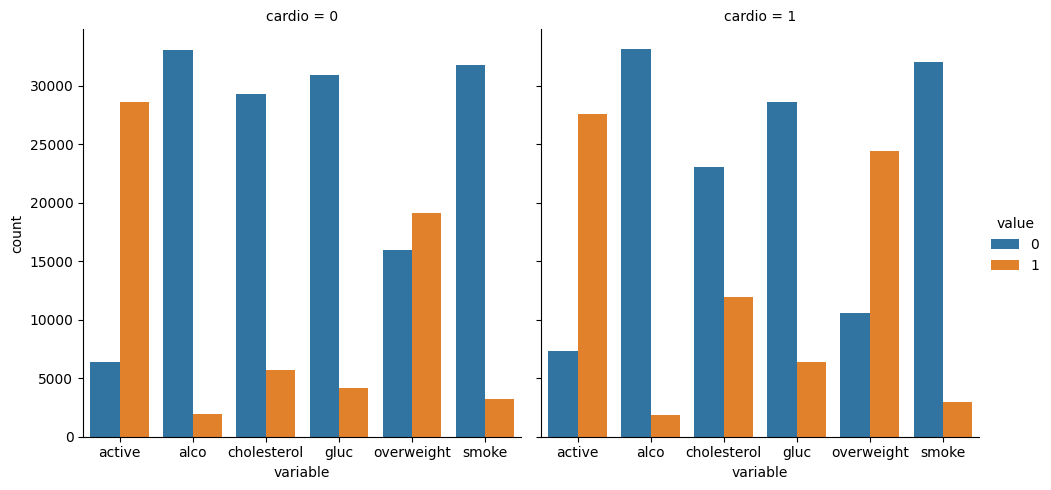

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/WillNRL/Medical-Data-Visualizer/main/medical_examination.csv'))

# Normalize the data by making 0 always good and 1 always bad. If the value of or is 1, make the value 0. If the value is more than 1, make the value 1.cholesterolgluc
df[['cholesterol','gluc']] = (df[['cholesterol','gluc']] > 1).astype(int)
'''                           ^
                              |
                              |
Selecionei as duas colunas solicitadas, utilizei uma estrutura condicional e em seguida converti os valores para inteiros utilizando o método astype(). Utilizei a lógica de que True é igual a 1 e False é igual a 0. Com essa estrutura condicional, obtive o resultado esperado.

I selected the two requested columns, used a conditional structure and then converted the values to integers using the astype() method. I used the logic that True is equal to 1 and False is equal to 0. With this conditional structure, I got the expected result.
'''
# Task
# Add an column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. 
# Use the value 0 for NOT overweight and the value 1 for overweight.overweight
df['height'] = df['height'] / 100
df['overweight'] = ((df['weight'] / df['height']**2) > 25).astype(int)
'''
        ^                                         ^
        |                                         |
Criando uma coluna;                               |
Fazendo o calculo de IMC, usando .astype(float) para converter os valores da coluna para float e divisando todos valores por 100 para virgula subir casas decimais;

Creating a column;
Doing the BMI calculation, using .astype(float) to convert the column values to float and dividing all values by 100 for the comma to go up to decimal places;
'''

'''
Primeira vez usando .melt() e sabendo da existencia de dataframes do tipo long e wide, obrigado freecodecamp.
First time using .melt() and knowing about the existence of long and wide dataframes, thanks freecodecamp.
'''
# Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's . The dataset should be split by 'Cardio' so there is one chart for each value. The chart should look like .catplot()cardioexamples/Figure_1.png
hist = (df[['cholesterol','gluc','alco','active','smoke','cardio','overweight']].melt(id_vars=['cardio'])).sort_values(by='variable')
'''                     ^
                        |
Criando um DataFrame no formato long utilizando o método .melt() do Pandas e formatando-o com id_vars=['cardio'], para que a variável 'cardio' seja colocada como a identificação das variáveis que serão transformadas em colunas abaixo do gráfico. Os valores correspondentes a essas variáveis serão colocados na coluna 'value'.

Creating a DataFrame in long format using Pandas's .melt() method and formatting it with id_vars=['cardio'], so that the 'cardio' variable is placed as the identification of the variables that will be transformed into columns below the graph . The values corresponding to these variables will be placed in the 'value' column.
'''
sns.catplot(data=hist, x='variable', hue='value', col='cardio', kind="count")
# (sns.catplot(data=hist, x='variable', hue='value', col='cardio', kind="count")).fig.savefig('catplot.png')

In [84]:
df_heat = df[ (df['ap_lo'] <= df['ap_hi']) &
              (df['weight'] >= df['weight'].quantile(0.025)) &
              (df['weight'] <= df['weight'].quantile(0.975)) &
              (df['height'] >= df['height'].quantile(0.025)) &
              (df['height'] <= df['height'].quantile(0.975))]
'''
Selecioando  somentos as  colunas e dados passados  acima com estrutura de condição.

Selecting only the columns and data passed above with structure condition.
''' 
corr = df_heat.corr()

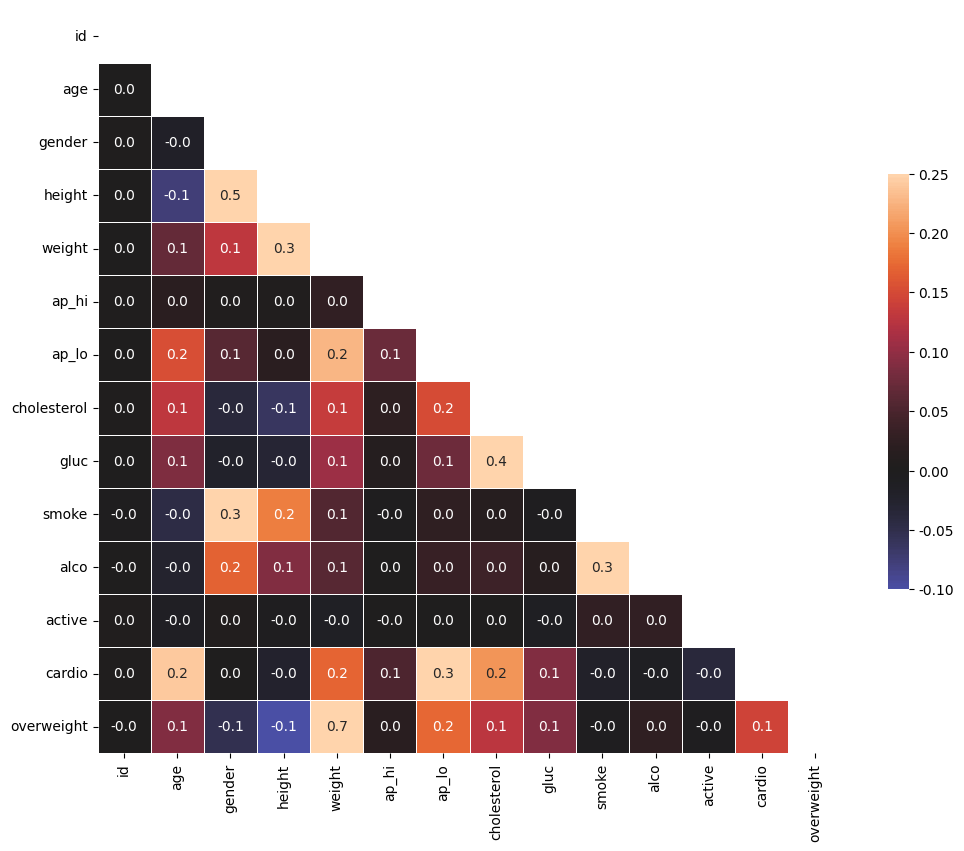

In [85]:
# Aqui, eu desisti totalmente de fazer e pesquisei na internet, mas ainda está errado o plot.
# Here, I totally gave up and searched the internet, but the plot is still wrong.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(
    corr,
    mask = mask,
    square= True,
    annot = True,
    linewidths = 0.5,
    fmt = '.1f',
    center = 0,
    vmin = -0.1,
    vmax = 0.25,
    cbar_kws={
        'shrink': .45,
        'format': '%.2f'
    })
plt.show(ax)

Versão do replit
Replit version

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/WillNRL/Medical-Data-Visualizer/main/medical_examination.csv'))

df[['cholesterol','gluc']] = (df[['cholesterol','gluc']] > 1).astype(int)
df['height'] = df['height'] / 100
df['overweight'] = ((df['weight'] / df['height']**2) > 25).astype(int)

def draw_cat_plot():
  hist = (df[['cholesterol','gluc','alco','active','smoke','cardio','overweight']].melt(id_vars=['cardio'])).sort_values(by='variable')
  catplot = sns.catplot(data=hist, x='variable', hue='value', col='cardio', kind="count")
  return catplot.fig.savefig('catplot.png')

def draw_heat_map():
  df_heat = df[ (df['ap_lo'] <= df['ap_hi']) &
                (df['weight'] >= df['weight'].quantile(0.025)) &
                (df['weight'] <= df['weight'].quantile(0.975)) &
                (df['height'] >= df['height'].quantile(0.025)) &
                (df['height'] <= df['height'].quantile(0.975))]

  corr = df_heat.corr()
  mask = np.zeros_like(corr)
  mask[np.triu_indices_from(mask)] = True
  fig, ax = plt.subplots(figsize=(12, 12))

  ax = sns.heatmap(
      corr,
      mask = mask,
      square= True,
      annot = True,
      linewidths = 0.5,
      fmt = '.1f',
      center = 0,
      vmin = -0.1,
      vmax = 0.25,
      cbar_kws={
          'shrink': .45,
          'format': '%.2f'
      })
  return fig.savefig('heatmap.png')